### Section 6: Principal Component Analysis Implementation
Principal component Analysis:

Goal:
- Reduce dimensionality of the data set with minimal loss of information.
- compress data without much loss of information, e.g., image compression

Principal Components:
- A subset of ordered abstract projection that can best preserve the variations and correlations of the original data
- A data with d features (d dimension data) can be (approximately) reproduced using k < d principal components 

Mathematically:
- An eigendecomposition of the covariance matrix
- Finds directions that maximize the variance in the dataset.
- In PCA, we are projecting the entire set of data onto a different subspace
- In PCA, we are trying to find the axes with maximum variances where the data is most spread

we might be interested in keeping only those eigenvectors with much larger eigenvalues, since they contain more information about the data. 

Create new feature subspce:
- eigenvalues that are close to 0 are less informative droped when we construct new feature subspace.

Algorithms for PCA
- Load a dataset that consists of d-dimensional features
- compute the covariance matrix of the data
- compute the eigenvalues and the corresponding eigenvectors
- Sort the eigenvectors by decreasing eigenvalues
- select k eigenvectors with the largest eigenvalues to form d x k matrix
- use d x k eigenvector matrix to transfor the sample to a new subspace.

Step-by-step Examples
- 2D data
- Eigenfaces

PCA function in Python echosystem
- Scikit-learn: sklearn.decomposition module
    - http://scikit-learn.org/stable/modules/decomposition.html#pca
- matplotlib
    - http://blog.nextgenetics.net/?e=42

### Step-by-step example - using  2D data¶

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

#### Simple Example - data points base on note from a tutorial on pca 
http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf  
 - Some code is givn in Scilab (free alternative to Matlab)
 - We will use Python and associated libraries

#### Step 1: Data

In [29]:
x = [2.5,0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1]
y = [2.4, 0.7, 2.9, 2.2,3.0,2.7,1.6,1.1,1.6,0.9]
data = np.array([x,y]).T
df = pd.DataFrame(data, columns=['x', 'y'])
df.head()

,x,y
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9
3,1.9,2.2
4,3.1,3.0


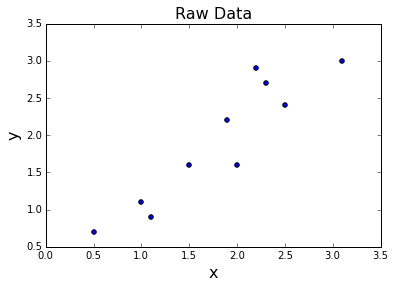

In [30]:
plt.scatter(df.x, df.y)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Raw Data', fontsize=16)
plt.show()

### Step 2: Subtract the mean
#### - Reviewed in lecture note 

In [31]:
mu = df.mean(axis=0)
mu

x    1.81
y    1.91
dtype: float64

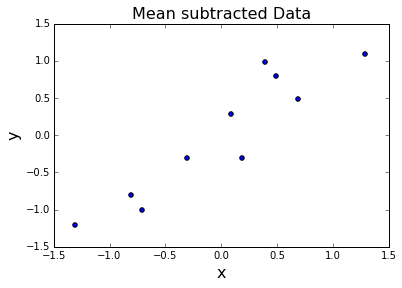

In [32]:
df = df - mu
plt.scatter(df.x,df.y)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Mean subtracted Data', fontsize=16)
plt.show()

In [34]:
print(df.mean(axis=0))

### Step 3: Calculate the covariance matrix $\Sigma$

In [48]:
#C = np.cov(df.T)
#C = np.cov(df, rowvar=0)
C = np.cov(df.x,df.y)
C

array([[ 0.61655556,  0.61544444],
       [ 0.61544444,  0.71655556]])

### Step 4: Calculate the eignvector and eigenvalues of the covariance matrix
- Recall the discussion from lecture about the eigenvales and eigenvectors of positive semidefinite matrix. 
- C is positives semidefinite (x*Cx >= 0) and symmetric

In [85]:
eigenvalues, eigenvectors = np.linalg.eigh(C)
print('Eigenvalues \n%s\n' %eigenvalues)
print('Eigenvectors \n%s' %eigenvectors)

Eigenvalues 
[ 0.0490834   1.28402771]

Eigenvectors 
[[-0.73517866  0.6778734 ]
 [ 0.6778734   0.73517866]]


###  Eigenvectors are orthonormal

In [88]:
print(np.dot(eigenvectors[1], eigenvectors[0]))
print('')
for vec in eigenvectors:
    print(np.linalg.norm(vec))
print(eigenvectors[:,1])

0.0

1.0
1.0
[ 0.6778734   0.73517866]


### Visualize the PCs

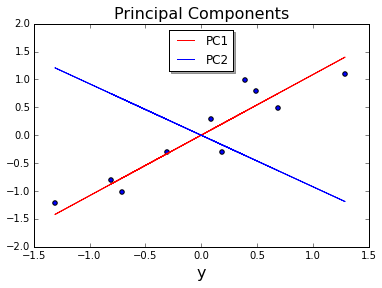

In [110]:
plt.scatter(df['x'], df['y'], marker='o')
h1 = (eigenvectors[1][1]/eigenvectors[0][1])*(df.x)
h2 = (eigenvectors[1][0]/eigenvectors[0][0])*(df.x)

#the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i]
#h1 = (0.73517866/0.6778734)*(df.x)
#h2 = (0.6778734/-0.73517866)*(df.x)

plt.plot(df.x, h1, color='red', label='PC1')
plt.plot(df.x, h2, color='blue', label='PC2')
plt.legend(loc='upper center', shadow=True)
#plt.axhline(y=0, xmin=-1.5, xmax=1.5)
#plt.axvline(x=0, ymin=-1.5, ymax=1.5)
#plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('x', fontsize =16)
plt.xlabel('y', fontsize =16)
plt.title('Principal Components', fontsize =16)
plt.show()

### Step 5: Dimensionality Reduction - select the principal component(s) 

#### Sort the eignvalues in descending order

In [124]:
idx = np.argsort (-eigenvalues )
eigenvalues = eigenvalues [ idx ]
eigenvectors = eigenvectors [: , idx ]
print(eigenvalues)
print(idx)
print('')
print(eigenvectors)
print('')
print(eigenvectors[:,0])

[ 1.28402771  0.0490834 ]
[0 1]

[[ 0.6778734  -0.73517866]
 [ 0.73517866  0.6778734 ]]

[ 0.6778734   0.73517866]


#### Check the principal component 
- Principal component: eigenvectors[:,0]

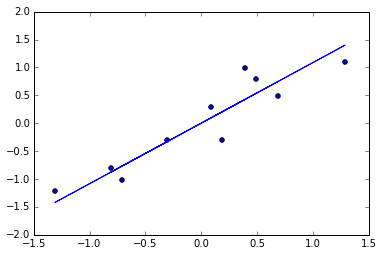

In [126]:
h = (eigenvectors[1][0]/eigenvectors[0][0])*df['x']
plt.scatter(df.x, df.y, marker='o')
plt.plot(df['x'], h)
plt.show()

#### Select the significant component (principal component)
- The second component can be ignored if we choose to keep one significant component
- The final dataset will have reduced dimension if the second component is ignored.
- Generally, some information could be lost, but may not be significant depending of the component.
- for d-dimensional original data, k < d principal components can be selected, which reduces the dimension of the new data.

#### Form Feature Vector  $V$ 
- Let us select only the eigenvector with higher eigenvalue
- Generally, k < d eigenvectors with the highest k eigenvalues

In [172]:
V = eigenvectors[:,0]
print(V)

[ 0.6778734   0.73517866]


### Step 6: Reduced Dimension - Create a new data $Y$ using the selected eigenvector(s)
        - A case when only one component is selected.

In [173]:
Y= np.dot(df, V)
#Y = pd.DataFrame(Y, columns=['Y'])
print(Y)

[ 0.82797019 -1.77758033  0.99219749  0.27421042  1.67580142  0.9129491
 -0.09910944 -1.14457216 -0.43804614 -1.22382056]


### Recovering the original data 
- $Y = FA$
    - F: Feature vector
    - A: mean adjuster original data
    - Y: Transformed new data
- $A = F^{-1}Y$
    - Note: eigenvectors are normalized, so $F^{-1} = F^{T}$
    - $A = F^{T}Y$


#### Recovering mean adjusted original data - for single eigenvector case

In [211]:
Y = Y.reshape(1, Y.size)
V = V.reshape(1, V.size)
A = np.dot(V.T, Y)
A = A.T

#### Recovering original data by putting back the subtracted mean

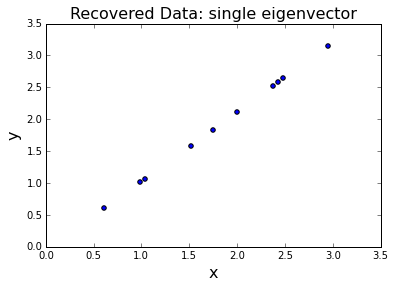

In [209]:
mu = mu.reshape(1, mu.size)
original = A + mu
plt.scatter(original[:,0], original[:,1])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Recovered Data: single eigenvector', fontsize=16)
plt.show()

### Return to a case when both eigenvectors are kept 
- projection onto eigenvectors (rotation of axes)
- Feature vector contains both eiegnvectors

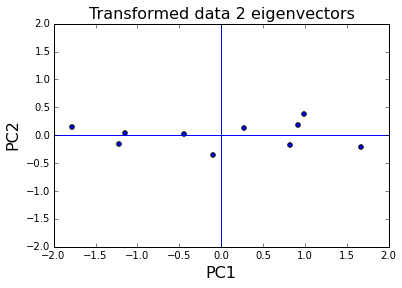

In [271]:
V = eigenvectors
Y= np.dot(df, V)
#print(Y)

plt.scatter(Y[:,0], Y[:,1])
plt.axvline(x=0, ymin=-2, ymax=2)
plt.axhline(y=0, xmin=-2, xmax=2)
plt.ylim(-2,2)
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.title('Transformed data 2 eigenvectors', fontsize=16)
plt.show()

In [263]:
print(mu[0])

[ 1.81  1.91]


#### Recovering original data - 2 eigenvector case

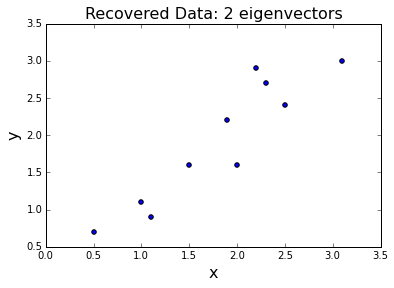

In [272]:
Y = Y.T
A = np.dot(V, Y)
A = A.T
mu = mu.reshape(1, mu.size)
original = A + mu
plt.scatter(original[:,0], original[:,1])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Recovered Data: 2 eigenvectors', fontsize=16)
plt.show()

## A look at real data

### 1) Load Data

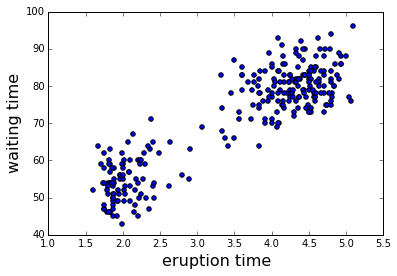

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [354]:
old_faithful = pd.read_fwf('old_faithful_data.txt', usecols=["eruptions", "waiting"])
old_faithful.describe()
plt.scatter(old_faithful.eruptions, old_faithful.waiting)
plt.xlabel('eruption time', fontsize=16)
plt.ylabel('waiting time', fontsize=16)
plt.show()
old_faithful.head()

In [356]:
df = old_faithful
df.columns = ['x', 'y']
df.head()

,x,y
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


### 2) subtract the mean from each data point

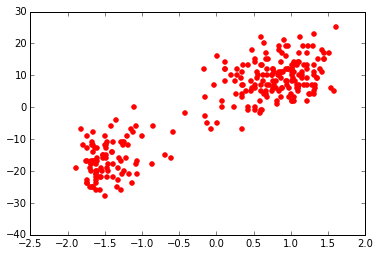

In [357]:
mean_x = np.mean(df['x'])
mean_y = np.mean(df['y'])
df['x'] = df['x'] - np.mean(df['x'])
df['y'] = df['y'] - np.mean(df['y'])
plt.scatter(df['x'], df['y'], color='r')
plt.show()

### 3) Calculate the covariance matrix

In [358]:
cov_df = np.cov(df, rowvar=0) 
cov_df

array([[   1.30272833,   13.97780785],
       [  13.97780785,  184.82331235]])

### 4) Find eigenvectors and eigenvalues

In [359]:
w,v = np.linalg.eig(cov_df)

print('Eigenvectors \n%s' %v)
print('\nEigenvalues \n%s' %w)

Eigenvectors 
[[-0.99714491 -0.0755118 ]
 [ 0.0755118  -0.99714491]]

Eigenvalues 
[   0.24421674  185.88182394]


In [360]:
# Check the eigenvectors are normalized
for eigenvector in v:
    print(np.linalg.norm(eigenvector))

1.0
1.0


In [361]:
# orthogonal
print(np.dot(v[0],v[1]))

0.0


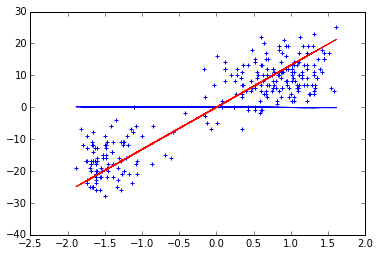

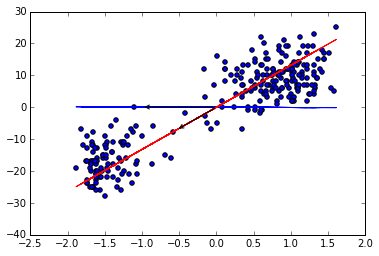

In [362]:
h1 = (v[1][0]/v[0][0])*df['x'] 
h2 = ( v[1][1]/v[0][1])*df['x']
plt.scatter(df['x'], df['y'], marker='+')
plt.plot(df['x'], h1)
plt.plot(df['x'], h2, color='r')
plt.show()

projected_data = np.dot(df, v)
sigma = projected_data.std(axis=0).mean()

fig, ax = plt.subplots()
ax.scatter(df['x'], df['y'])
ax.plot(df['x'], h1)
ax.plot(df['x'], h2, color='r')

# another way
ax.annotate("",
            xy=(v[0][0], v[1][0]), xycoords='data',
            xytext=(0.0, 0.0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
ax.annotate("",
            xy=(sigma*v[0][1], sigma*v[1][1]), xycoords='data',
            xytext=(0.0, 0.0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
plt.show()

## Eigenfaces
- AT&T faces
- The database for the faces can be found in link below
- http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html
    - download the zipped file and unzip/unpack the file
    - Placed it under Working directory within anaconda directory
    - Created a directory Section6PCA and placed the folder orl_faces
    - There are 40 directories in orl_faces s1, s2, ..., s40
    - Each directory contains individual faces taken at different angle, lighting, facial expression.

In [275]:
# Do conda install pillow
from PIL import Image
import os

### Examine original image using the function below.

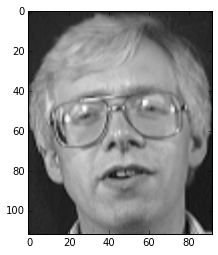

In [297]:
def view_original(i, pic):
    iPath = "Section6PCA/faces/s"
    iPath = iPath + str(i) +  "/" + str(pic) + ".pgm"
    im = Image.open(iPath) 
    plt.figure()
    plt.gray()
    plt.imshow(im)
    return np.array(im).shape[0:2]

m,n = view_original(2, 1)

### Read images for file and populate the data into a matrix $X$ as a row data
    - Place m x n iamge data in a row (flatten)
    - Each row holds one image data

In [298]:

def read_images_to_matrix(path, num_folders):
    X = []
    for i in range(1, num_folders):
        path = iPath+str(i)+"/"
        print(i, str(path))
        listing = os.listdir(path) 
        for file in listing:
            if(file[-3:] == 'pgm'):
                img = Image.open(path+file)
                #img = img.convert ("L")
                X.append ( np.asarray (img , dtype = np.uint8 ).flatten())
            else:
                continue
    return np.array(X)


In [299]:
iPath = "Section6PCA/faces/s"
I = read_images_to_matrix(iPath, 11)
print(I.shape[0:2])

1 Section6PCA/faces/s1/
2 Section6PCA/faces/s2/
3 Section6PCA/faces/s3/
4 Section6PCA/faces/s4/
5 Section6PCA/faces/s5/
6 Section6PCA/faces/s6/
7 Section6PCA/faces/s7/
8 Section6PCA/faces/s8/
9 Section6PCA/faces/s9/
10 Section6PCA/faces/s10/
(46, 10304)


### Perform PCA calculation

In [300]:
def pca_calculation(I, num_components):
    [nv , d] = I.shape
    print(nv,d)
    mean_I = np.mean(I, 0)
    ma_I = I - mean_I
    # calculate the eigenvectors (eigenimages) and eigenvalues
    M = np.dot(ma_I,ma_I.T) #covariance matrix
    eigenvalues,eigenvectors = np.linalg.eigh(M)
    eigenvectors = np.dot(ma_I.T, eigenvectors)
    for i in range (nv):
        eigenvectors [:,i] = eigenvectors [:,i]/ np.linalg.norm ( eigenvectors [:, i])
    idx = np.argsort(-eigenvalues) #returns the index with increasing order 
                                   #(-z1 makes it decreasing order)
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    print(M.shape[0:2])
    #return only num_components 
    eigenvalues = eigenvalues[0: num_components].copy ()
    eigenvectors = eigenvectors[: ,0: num_components ].copy ()
    return(eigenvalues, eigenvectors, mean_I)    

In [321]:
num_components = 46
eigenvalues, eigenvectors, mean_I = pca_calculation(I, num_components)

46 10304
(46, 46)


### The mean of the images

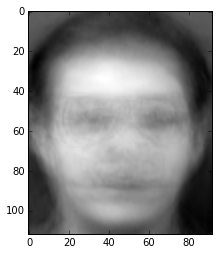

In [322]:
plt.figure()
plt.gray()
plt.imshow(mean_I.reshape(m,n))
plt.show()

### Reconstructing the image

In [337]:
def pca_reconstruction(numEvs):
    weights = np.dot( I[4].reshape(1,-1) - mean_I, eigenvectors[: ,0: numEvs ])
    #reconstruct using principal components
    recon = mean_I + np.dot( weights, eigenvectors[: ,0: numEvs ].T)
    plt.figure()
    plt.gray()
    plt.imshow(recon.reshape(m,n))

(10304,)
(1, 10304)


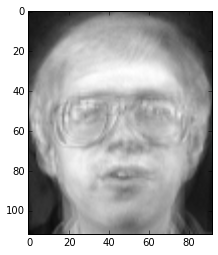

In [352]:
numEvs = 8 
pca_reconstruction(numEvs)

### Using Scikit

(46, 10304)


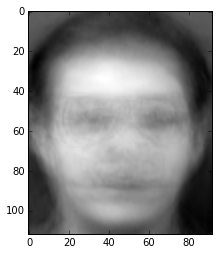

In [350]:
from sklearn.decomposition import PCA
X = I
print(X.shape[0:2])
n_components = 20
pca = PCA(n_components)
# X is the matrix transposed (n samples on the rows, m features on the columns)
pca.fit(X)

X_proj = pca.transform(X)
pca.mean_

plt.figure()
plt.gray()
plt.imshow(pca.mean_.reshape(m,n))
plt.show()